In [26]:
import pandas as pd
import numpy as py

In [2]:
df = pd.read_csv('advertising.csv')

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
#feature enginerring.
df['total_amount_spend']=df['TV']+df['Radio']+df['Newspaper']

In [7]:
df.head()

,TV,Radio,Newspaper,Sales,total_amount_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0


In [8]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales', 'total_amount_spend'], dtype='object')

In [9]:
#train test split

In [10]:
df.head()

,TV,Radio,Newspaper,Sales,total_amount_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0


In [12]:
#value haru null chh ki nai vani check gareko..
df.isnull().sum()

TV                    0
Radio                 0
Newspaper             0
Sales                 0
total_amount_spend    0
dtype: int64

In [13]:
import seaborn as sns

<Axes: xlabel='total_amount_spend', ylabel='Sales'>

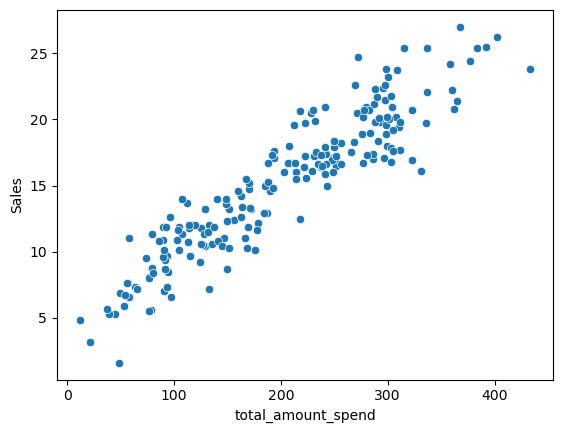

In [14]:
sns.scatterplot(data=df,x=df['total_amount_spend'],y=df['Sales'])
#kharch bardai jada sales ni bardai jane vayo.
``

<Axes: xlabel='TV', ylabel='Sales'>

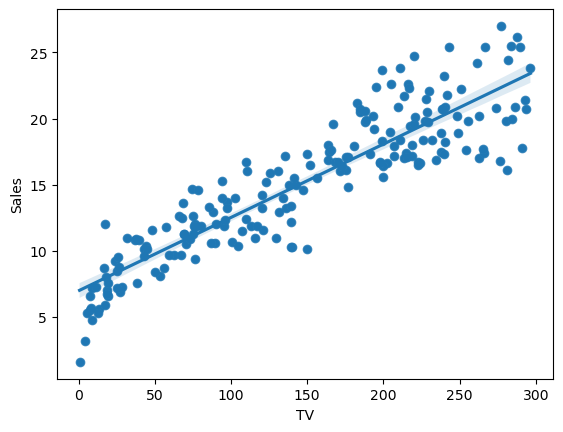

In [16]:
sns.scatterplot(data=df,x=df['TV'],y=df['Sales'])
sns.regplot(data=df,x=df['TV'],y=df['Sales'])

<Axes: xlabel='Radio', ylabel='Newspaper'>

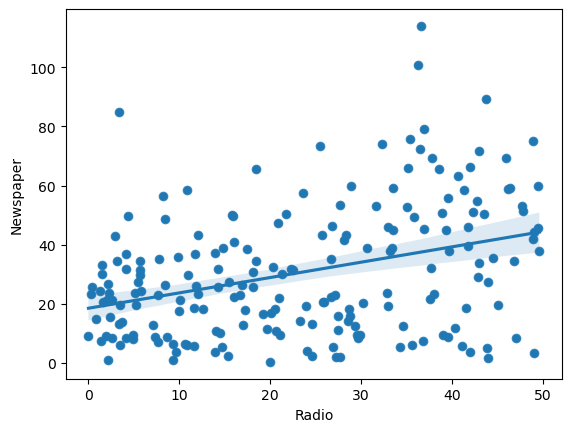

In [22]:
sns.scatterplot(data=df,x=df['Radio'],y=df['Newspaper'])
sns.regplot(data=df,x=df['Radio'],y=df['Newspaper'])

In [23]:
X = df[['TV']]
y =df['Sales']

In [29]:
from sklearn.model_selection import train_test_split

In [32]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
  X,y, test_size=0.3, random_state=10) 

In [35]:
# X is the indepent variable and Y is the target variable (output).

In [37]:
8from sklearn.linear_model import LinearRegression

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
len(X_train)
# (60/70 value add)

140

In [42]:
len(X_test)
# (20,30 value add)


60

In [43]:
len(df)

200

In [45]:
# Prediction
# we can get the coefficient and intercept values from the model using attributes like coef_ and 
# intercept_:

In [47]:
print(model.coef_)
print(model.intercept_)

[0.05338906]
7.150594888804454


In [49]:
# you duita value bata we can calculate linear regression with
#y=mx+b
# m is the coefficient while b is the intercep,
# using this formula we can calculate manually
# for eg: 40 dollar ko TV ad garda sale kati?


In [51]:
Y = 0.05338906*40 + 7.150594888804454

In [52]:
Y

9.286157288804453

In [53]:
round(Y,2)

9.29

In [54]:
# We can also get predicion results from the model using the predict method 

In [55]:
# we can use the predict method to predict more than one X data with the same method:

In [57]:
y_pred = model.predict(X_test)

In [58]:
# To see the comparison of the actual data with the predicted data, we can run the following code:

In [59]:
act_predict = pd.DataFrame({
    'Actual' : y_test.values.flatten(),
    'Predict' : y_pred.flatten()
})
act_predict.head(5)
#flatten le toe

,Actual,Predict
0,18.4,18.399670
1,7.2,7.615080
2,18.0,18.810766
3,25.5,22.291733
4,22.6,18.703988


In [61]:
# actual ra predict ma khasai farak dekhadaina esma
# lets predict with plot

<Axes: >

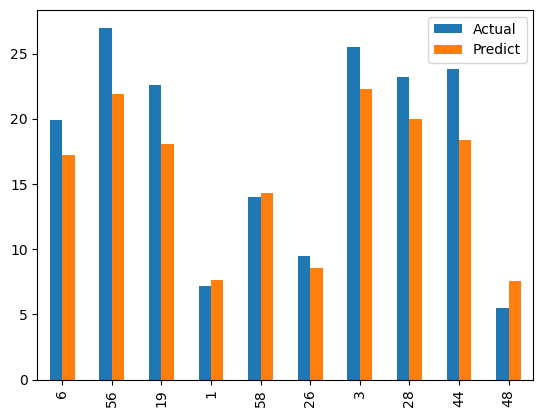

In [66]:
act_predict.sample(10).plot(kind='bar')

In [68]:
# aba model evaluation garum
model.score(X_test,y_test)

0.8288743166580129

In [ ]:
# multiple regression ko herum since multiple independent variable le asar garcha dependent 
# variable lai
# sales depend garcha tv radio newspaper ma

In [70]:
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

In [72]:
X_train, X_test, y_train, y_test=train_test_split(
    X,y,test_size= 0.3, random_state = 10
)

In [75]:
# training dim aba
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [76]:
model.score(X_test, y_test)

0.9032402609859365

In [77]:
# The accuracy value increases as we add more features.

In [78]:
# Save garana
import pickle

In [81]:
filename = 'saved.sav'
pickle.dump(model, open(filename, 'wb'))

In [82]:
tv = 40
radio = 23
newspaper = 3
pred = model.predict([[
    tv, radio, newspaper
]])
print(pred)

[9.48236314]


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
